# Twitter Sentiment Analysis
Given a tweet, We will decide if it has a positive sentiment or a negative one. In the whole process we have:

    Learned how to extract features for logistic regression given some text
    Implemented logistic regression from scratch
    Applied logistic regression on a natural language processing task
    Tested by our logistic regression
    Performed error analysis


### Major Tasks :

* Part 0 : Preprocessing Tweets
* Part 1 : Implementing Logistic Regression from SCRATCH
* Part 2 : Extracting the Features
* Part 3 : Training Our Logistic Regression Model
* Part 4 : Testing Our Logitic Regression Model
* Part 5 : Error Analysis
* Part 6 : Predict with your own tweet

In [252]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [253]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to C:\Users\BKD-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [254]:
print(type(twitter_samples))

<class 'nltk.corpus.reader.twitter.TwitterCorpusReader'>


In [255]:
all_pos_tweet=twitter_samples.strings('positive_tweets.json')
all_neg_tweet=twitter_samples.strings('negative_tweets.json')

In [256]:
print(len(all_pos_tweet))
print(len(all_neg_tweet))
print('\ntype :\n',type(all_pos_tweet))
print(type(all_neg_tweet))

5000
5000

type :
 <class 'list'>
<class 'list'>


In [257]:
all_pos_tweet[2]

'@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!'

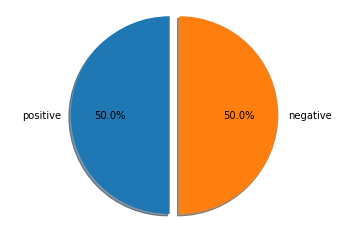

In [258]:
labels='positive','negative'
sizes=[len(all_pos_tweet),len(all_neg_tweet)]
#explodes only first slice
explodes=(0,0.1)
plt.pie(sizes,labels=labels,explode=explodes,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

In [259]:
#printing a random positive tweet
print(all_pos_tweet[random.randint(0,5000)])

@ChrisChivers2 nice word :)


In [260]:
#printing a random negative tweet
print(all_neg_tweet[random.randint(0,5000)])

@iainbruce not good :(


In [261]:
# split the data into two pieces, one for training and one for testing (validation set) 
#We have total of 5000positive tweets and 5000 of negative tweets
test_pos = all_pos_tweet[4000:]
train_pos = all_pos_tweet[:4000]
test_neg = all_neg_tweet[4000:]
train_neg = all_neg_tweet[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [262]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [263]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


## Part 0 : Preprocessing
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

   * Tokenizing the string
   * Lowercasing
   * Removing stop words and punctuation
   * Stemming

In [235]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def process_data(tweet):
    stem_obj=PorterStemmer()
    stop_eng=stopwords.words('english')
    punct=string.punctuation
    
    tweet=re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    
    #Tokenizing
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    clean_tweets=[]
    
    for word in tweet_tokens:
        if word not in stop_eng and word not in punct:
            stem_word=stem_obj.stem(word)
            clean_tweets.append(stem_word)
        
    return clean_tweets

In [236]:
print(type(test_y))
#The type of y is nd array so we need to change the ndArray to list so that it can be iteratable


def build_freq_dict(tweets,ys):
    freqs={}
    y_list=np.squeeze(ys).tolist()
    for y,tweet in zip(y_list, tweets):
        for word in process_data(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

<class 'numpy.ndarray'>


## Part 1 : Implementing Logistic Regression from SCRATCH
### Part 1.1 Sigmoid Function

In [237]:
def Sigmoid_fn(z):
    return (1/(1+np.exp(-z)))


### Part 1.2 Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

    𝐽(𝜃)=−1𝑚∑𝑖=1𝑚𝑦(𝑖)log(ℎ(𝑧(𝜃)(𝑖)))+(1−𝑦(𝑖))log(1−ℎ(𝑧(𝜃)(𝑖)))

* 𝑚 is the number of training examples
* 𝑦(𝑖) is the actual label of the i-th training example.
* ℎ(𝑧(𝜃)(𝑖)) is the model's prediction for the i-th training example.

The loss function for a single training example is

    𝐿𝑜𝑠𝑠=−1×(𝑦(𝑖)log(ℎ(𝑧(𝜃)(𝑖)))+(1−𝑦(𝑖))log(1−ℎ(𝑧(𝜃)(𝑖))))

* All the ℎ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 (ℎ(𝑧(𝜃))=1) and the label 𝑦 is also 1, the loss for that training example is 0.
* Similarly, when the model predicts 0 (ℎ(𝑧(𝜃))=0) and the actual label is also 0, the loss for that training example is 0.
* However, when the model prediction is close to 1 (ℎ(𝑧(𝜃))=0.9999) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. −1×(1−0)×𝑙𝑜𝑔(1−0.9999)≈9.2 The closer the model prediction gets to 1, the larger the loss

In [238]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

In [239]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


## Instructions: Implement gradient descent function
* The number of iterations `num_iters` is the number of times that we'll use the entire training set.
* For each iteration, we'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [251]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    
    # get 'm', the number of rows in matrix x
    m = len(x)
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1/m*(np.dot(y.T,np.log(h))+np.dot((1-y.T),(np.log(1-h))))

        # update the weights theta
        theta = theta-((alpha/m)*(np.dot(x.T,(h-y))))
     
    J = float(J)
    return J, theta

In [241]:

def sigmoid(z): 
        h = 1/(1+np.exp(-z))
        return h

## Part 2: Extracting the features

* Given a list of tweets, extract the features and store them in a matrix. We have to extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
* Then train our logistic regression classifier on these features.
* Test the classifier on a validation set. 

### Instructions: Implement the extract_features function. 
* This function takes in a single tweet.
* Process the tweet using the imported `process_tweet()` function and save the list of tweet words.
* Loop through each word in the list of processed words
    * For each word, check the `freqs` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)


In [242]:
#print(type(train_y))
# create frequency dictionary
freqs = build_freq_dict(train_x,train_y)
#print(freqs)
# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11346


In [243]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_data(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [249]:

def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_data(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        if(freqs.get((word,1.0))!=None):
            x[0,1] += (freqs.get((word,1.0)))
        else:
            x[0,1]+=0
        # increment the word count for the negative label 0
        
        if (freqs.get((word,0.0))!=None):
            x[0,2] += (freqs.get((word,0.0)))
        else:
            x[0,2] +=0
        
    
    assert(x.shape == (1, 3))
    return x

## Part 3: Training Your Model

To train the model:
* Stack the features for all training examples into a matrix `X`. 
* Call `gradientDescent`, which we've implemented above.


In [245]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24216529.
The resulting vector of weights is [7e-08, 0.0005239, -0.00055517]


# Part 4: Test your logistic regression

It is time to test our logistic regression function on some new input that your model has not seen before. 

#### Instructions: Write `predict_tweet`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [246]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    return y_pred

In [247]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561


In [248]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.81636424]])

## Check performance using the test set
After training our model using the training set above, check how our model might perform on real, unseen data, by testing it against the test set.

#### Instructions: Implement `test_logistic_regression` 
* Given the test data and the weights of our trained model, calculate the accuracy of your logistic regression model. 
* Use our `predict_tweet()` function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification `y_hat` to 1, otherwise set the model's classification `y_hat` to 0.
* A prediction is accurate when `y_hat` equals `test_y`.  Sum up all the instances when they are equal and divide by `m`.


In [208]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    test_y_list=np.squeeze(test_y).tolist()
    score=0
    for s in range(len(test_y_list)):
        if(test_y_list[s]==y_hat[s]):
            score+=1
        
    accuracy = score/len(test_y_list)
    return accuracy

In [209]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


## Part 5: Error Analysis

In this part we will see some tweets that your model misclassified. Why do you think the misclassifications happened? Specifically what kind of tweets does our model misclassify?

In [211]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_data(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_data(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp
THE PROCESSED TWEET IS: ['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']
1	0.49996890	b'truli later move know queen bee upward bound movingonup'
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48622857	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48370665	b"i'm play brain dot braindot"
THE TWEET IS: I'm p

## Part 6: Predict with your own tweet

In [215]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_data(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139087]]
Negative sentiment
